# Assignment03 : k-means algorithm

# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub link : https://github.com/joo228/assignment.git

# import packages (numpy, matplotlib, sys) for computing function & plotting graph & maxint

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# define function of generating n 2-dimension points for k clusters

In [60]:
def generatePointCluster(k, n):
    m=int(n/k)
    x_mean = np.arange(100,(k*100+1),100)
    y_mean = np.arange(50,(k*50+1),50)
    x_rand = np.random.randn(m)
    y_rand = np.random.randn(m)
    x_value = []
    y_value = []
    for i in range(k):
        x_value.extend(x_rand*10*(i+2)+x_mean[i])
        y_value.extend(y_rand*10*(k-i+5)+y_mean[i])
    return x_value, y_value

# generating 450 2D points for 3 clusters and plotting

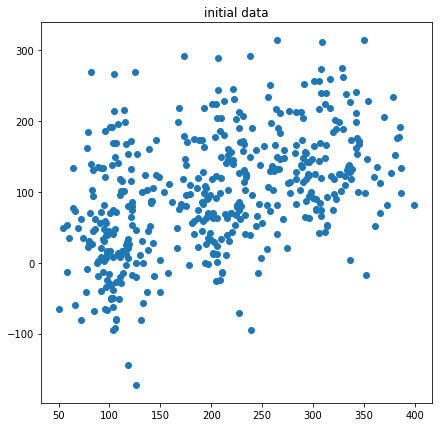

In [61]:
k = 3
n = 450
x_values, y_values = generatePointCluster(k, n)
plt.figure(figsize=(7,7))
plt.scatter(x_values, y_values)
plt.title("initial data")
plt.show()

# define function of computing distance for pair of points 

# there are 3 types of computing distance
#### 1. Euclidean distance
#### 2. Euclidean distance (non square root)
#### 3. Manhattan distance

In [62]:
def computeDistance(x1, y1, x2, y2, mode):
    if mode == 0:
        return np.sqrt(np.square(x1-x2)+np.square(y1-y2))
    if mode == 1:
        return np.square(x1-x2)+np.square(y1-y2)
    if mode == 2:
        return np.absolute(x1-x2)+np.absolute(y1-y2)

# define function of initialise label

In [63]:
def initialiseLabel(k, n):
    label = [np.random.randint(0, k) for i in range(n)]
    return label

# define function of computing centroid of each cluster

In [64]:
def computeCentroid(k, x_values, y_values, label):
    X_centroid = np.zeros((k,), dtype=int)
    Y_centroid = np.zeros((k,), dtype=int)
    numOfLabel = np.zeros((k,), dtype=int)
    for i in range(len(x_values)):
        for j in range(k):
            if label[i]== j:
                X_centroid[j] = X_centroid[j] + x_values[i]
                Y_centroid[j] = Y_centroid[j] + y_values[i]
                numOfLabel[j] = numOfLabel[j] + 1
    for i in range(k):
        X_centroid[i] /= numOfLabel[i]
        Y_centroid[i] /= numOfLabel[i]
        
    return X_centroid, Y_centroid

# initialise label of points

In [65]:
initLabel = initialiseLabel(k, n)
labels = initLabel[:]

# compute centroid with initialized label

In [66]:
init_x_centroid, init_y_centroid = computeCentroid(k, x_values, y_values, labels)
x_centroid = init_x_centroid
y_centroid = init_y_centroid
print("initial centroid")
for i in range(k):
    print("label",i,": ","(", x_centroid[i],",",y_centroid[i],")")

initial centroid
label 0 :  ( 201 , 93 )
label 1 :  ( 203 , 97 )
label 2 :  ( 207 , 98 )


# define function of plotting points with initialized label

In [67]:
def plotPoint(k, x_value, y_value, X_centroid, Y_centroid, label, title=""):
    color = 'rbgcky'
    plt.figure(figsize=(7,7))
    n = len(x_value)
    numLabel = np.arange(k)
    for a in label:
        plt.scatter([x_value[i] for i in range(n) if label[i] == a], [y_value[i] for i in range(n) if label[i] == a], c=color[a])
    for a in range(k):
        plt.scatter(X_centroid[a], Y_centroid[a] ,marker="*" , c=color[a], s=500, edgecolor='k', label=a)
    plt.legend()
    plt.title(title)
    plt.show()

# plot points and centroid with initialized label

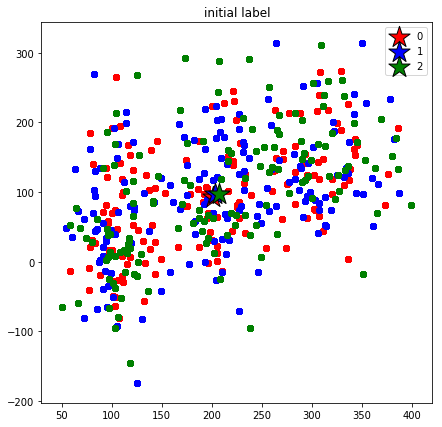

In [68]:
plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels, "initial label")

# define function of assigning label for points

In [69]:
def assignLabel(x_value, y_value, X_centroid, Y_centroid,label, k, n, mode):
    for i in range(n):
        min_label = 0
        min_distance = computeDistance(x_value[i], y_value[i], X_centroid[0], Y_centroid[0], mode)
        for j in range(1, k):
            current_distance = computeDistance(x_value[i], y_value[i], X_centroid[j], Y_centroid[j], mode)
            if current_distance<min_distance:
                min_distance = current_distance
                min_label = j
        label[i] = min_label
    return

# define function of computing energy of current clusters

In [70]:
def computeEnergy(x_value, y_value, X_centroid, Y_centroid, label):
    energy = 0
    for i in range(len(x_value)):
        energy += np.square(x_value[i]-X_centroid[label[i]])+np.square(y_value[i]-Y_centroid[label[i]])
    energy /= (len(x_value)+1)
    return energy

## 1. assign label of each points
## 2. compute centroid with initialized label 
## 3. plot points & centroid
## 4. compute the energy of current clusters

### continue 1 - 4 until energy does not change!!

# a. using Euclidean distance for computing distance

iteration 1  energy:  14873.0246409


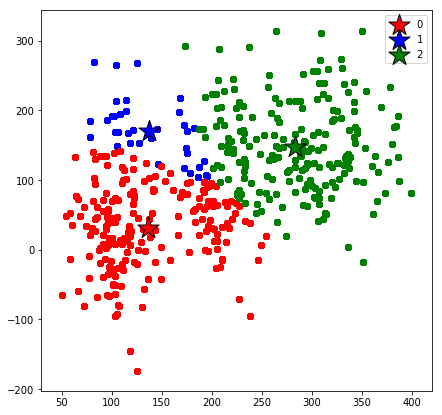

iteration 2  energy:  5892.19278866


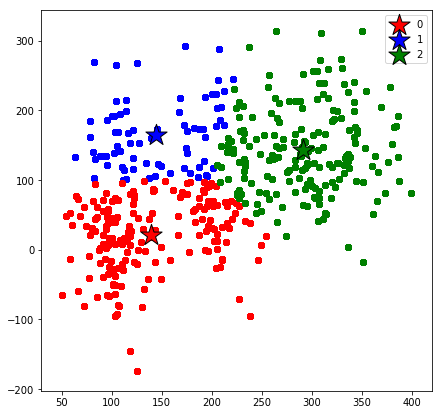

iteration 3  energy:  5357.85446884


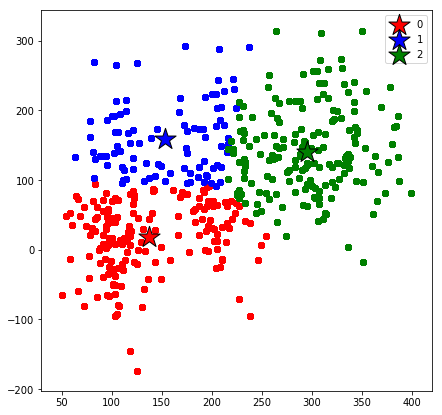

iteration 4  energy:  5278.79801304


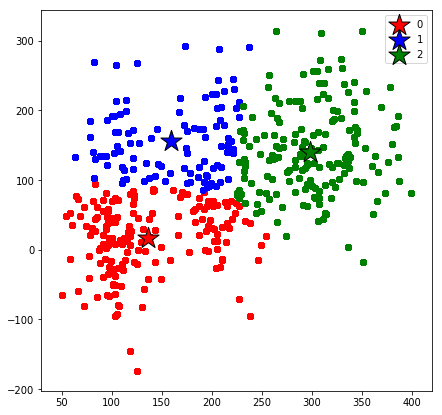

iteration 5  energy:  5236.75907292


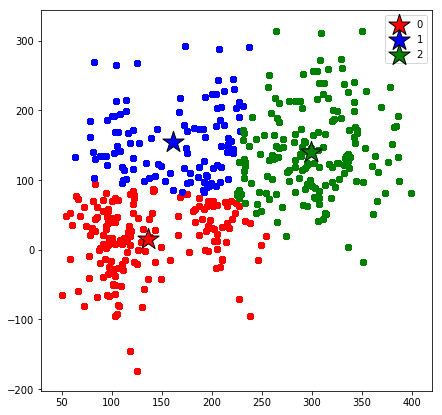

iteration 6  energy:  5227.22321805


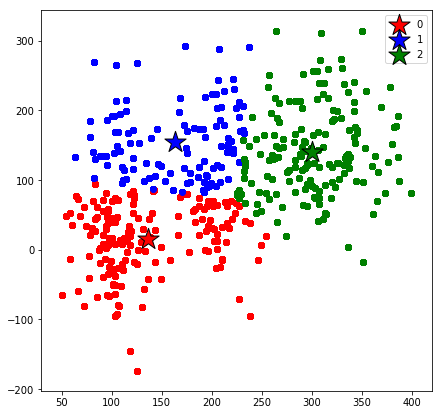

iteration 7  energy:  5224.45122112


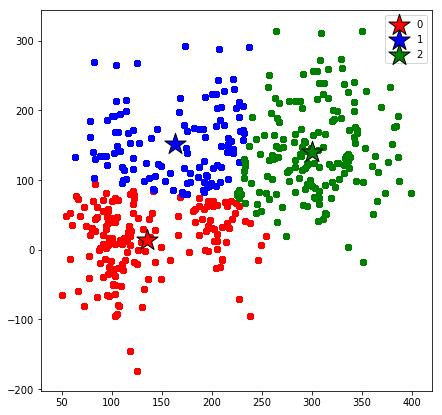

iteration 8  energy:  5224.03611832


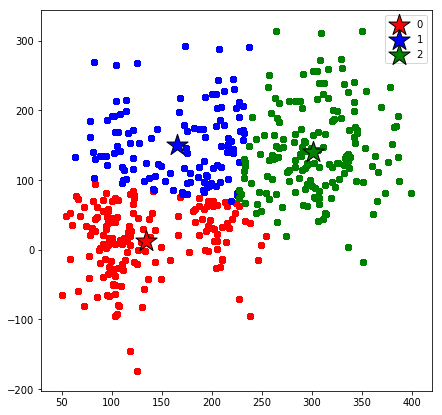

iteration 9  energy:  5217.82719453


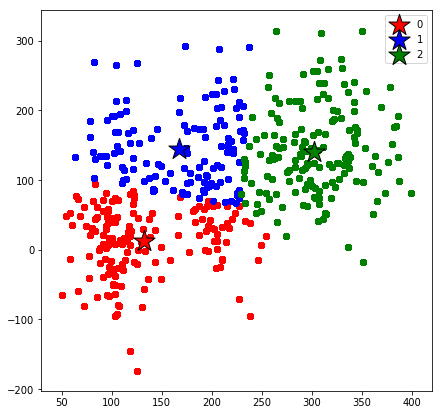

iteration 10  energy:  5205.50717221


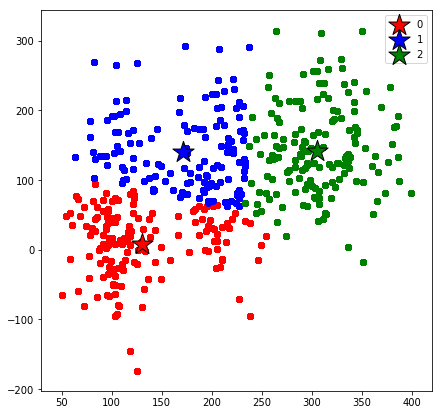

iteration 11  energy:  5172.21413489


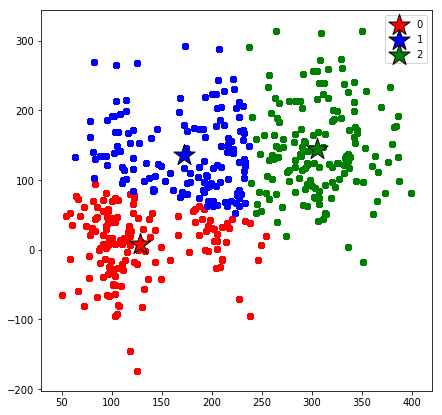

iteration 12  energy:  5152.71311646


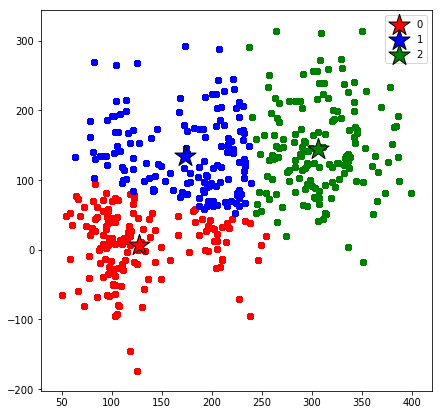

iteration 13  energy:  5147.91203635


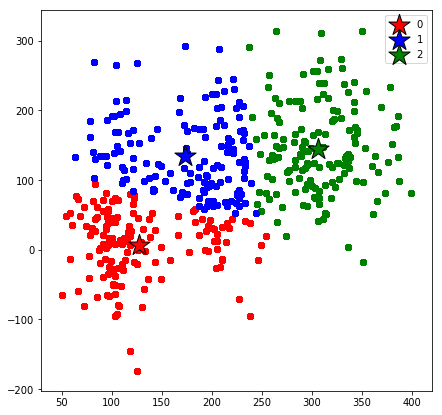

iteration 14  energy:  5146.18390483


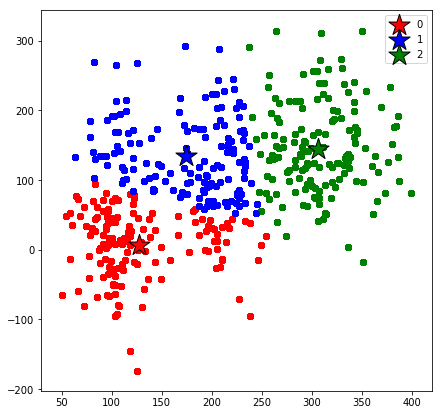

iteration 15  energy:  5145.37755851


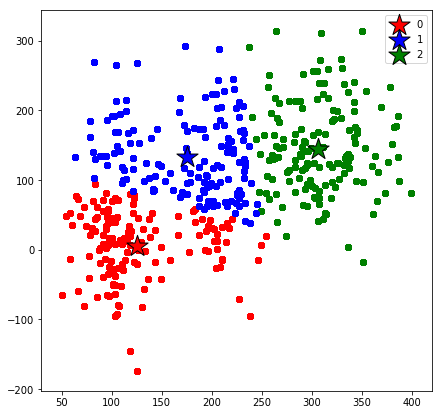

iteration 16  energy:  5144.51322277


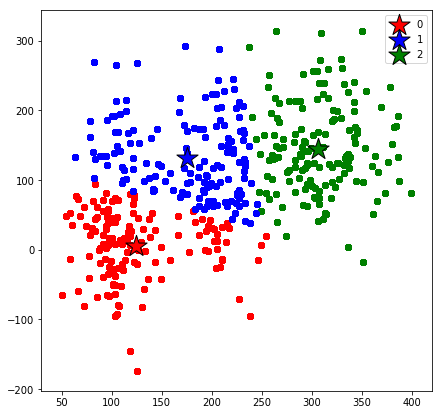

iteration 17  energy:  5143.21800819


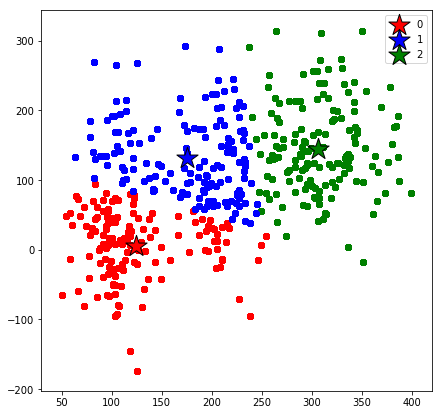

18 iteration with Euclidean distance
final centroid of Euclidean distance
label 0 :  ( 124 , 6 )
label 1 :  ( 175 , 132 )
label 2 :  ( 306 , 145 )


In [71]:
energy = sys.maxsize
iteration = 1
while energy > computeEnergy(x_values, y_values, x_centroid, y_centroid, labels):
    energy = computeEnergy(x_values, y_values, x_centroid, y_centroid, labels)
    print("iteration",iteration," energy: ", energy)
    assignLabel(x_values, y_values, x_centroid, y_centroid,labels, k, n, 0)
    x_centroid, y_centroid = computeCentroid(k, x_values, y_values, labels)
    plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels)
    iteration = iteration + 1
print(iteration,"iteration with Euclidean distance")
print("final centroid of Euclidean distance")
for i in range(k):
    print("label",i,": ","(", x_centroid[i],",",y_centroid[i],")")

# b. using Euclidean distance (non square root) for computing distance

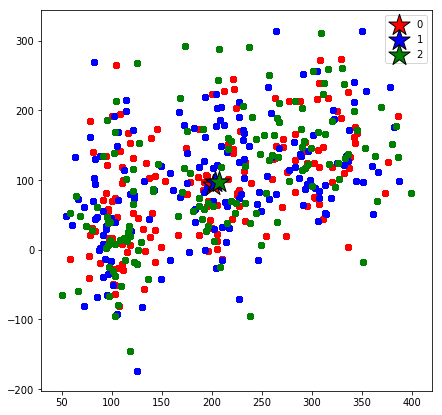

iteration 1  energy:  14873.0246409


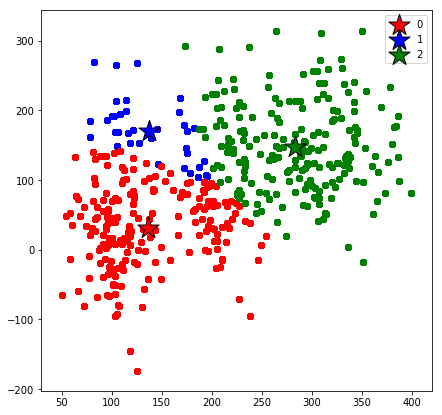

iteration 2  energy:  5892.19278866


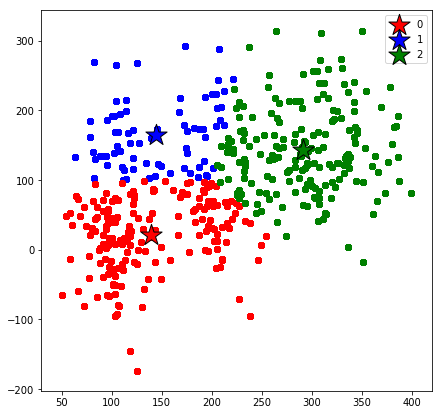

iteration 3  energy:  5357.85446884


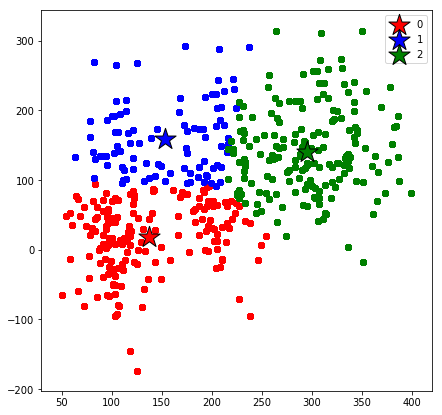

iteration 4  energy:  5278.79801304


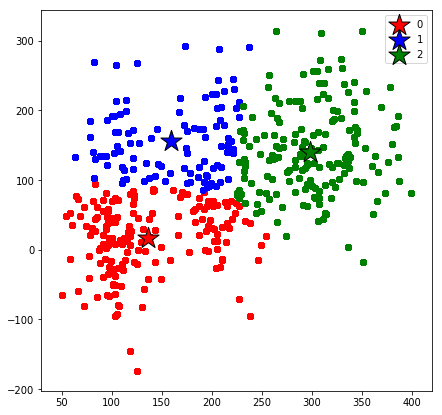

iteration 5  energy:  5236.75907292


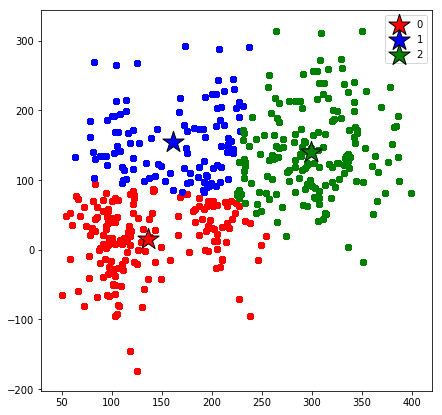

iteration 6  energy:  5227.22321805


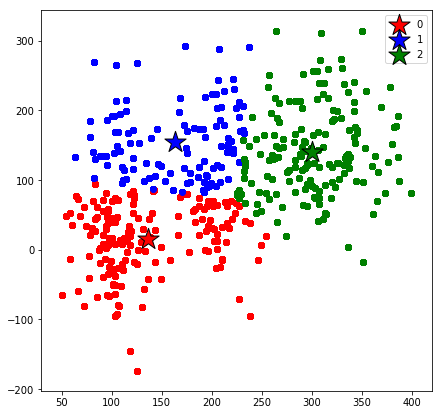

iteration 7  energy:  5224.45122112


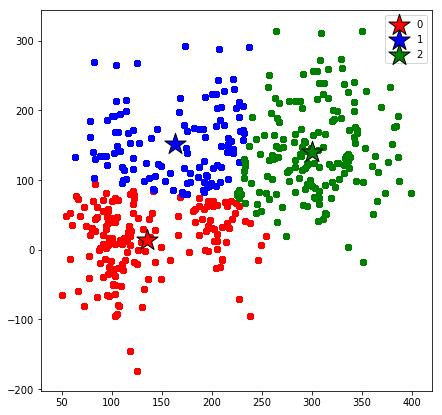

iteration 8  energy:  5224.03611832


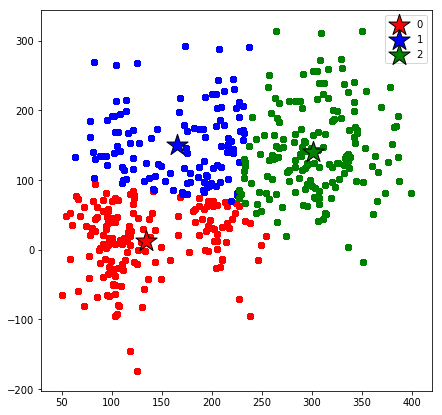

iteration 9  energy:  5217.82719453


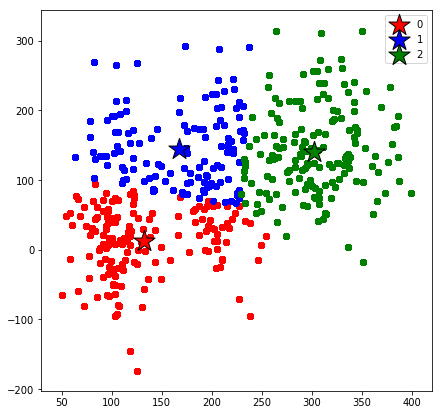

iteration 10  energy:  5205.50717221


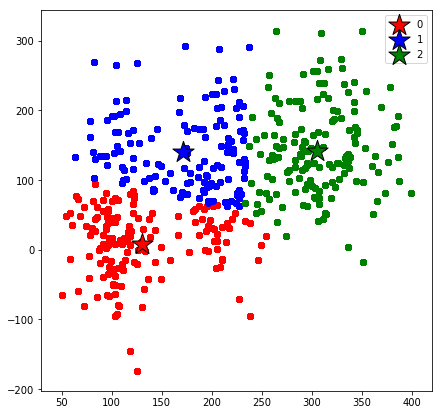

iteration 11  energy:  5172.21413489


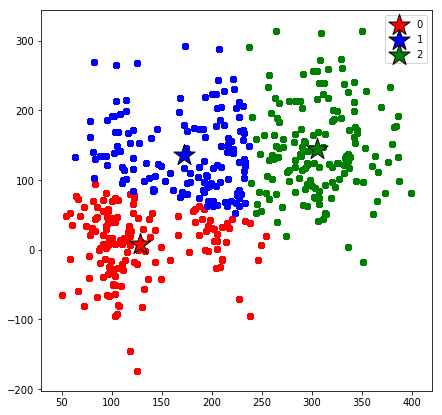

iteration 12  energy:  5152.71311646


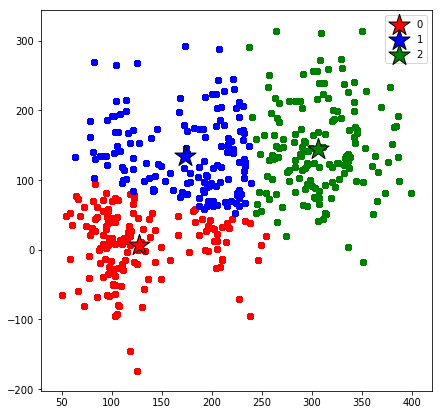

iteration 13  energy:  5147.91203635


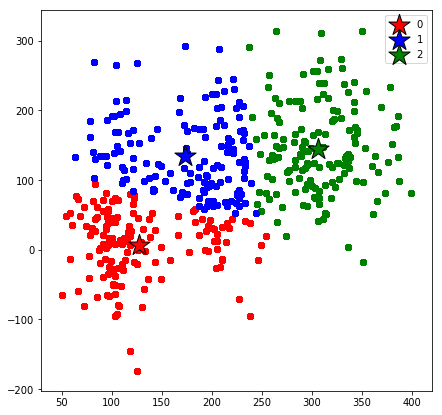

iteration 14  energy:  5146.18390483


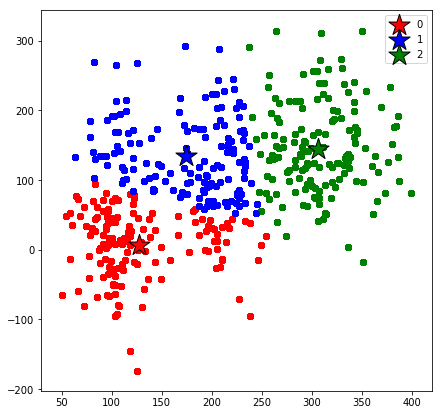

iteration 15  energy:  5145.37755851


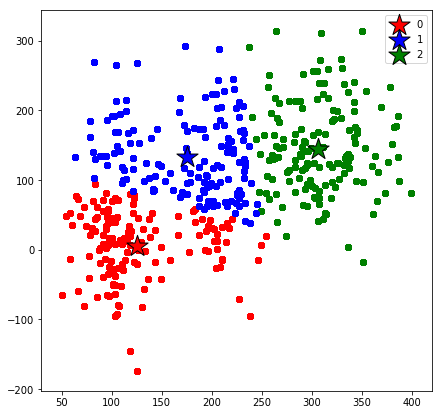

iteration 16  energy:  5144.51322277


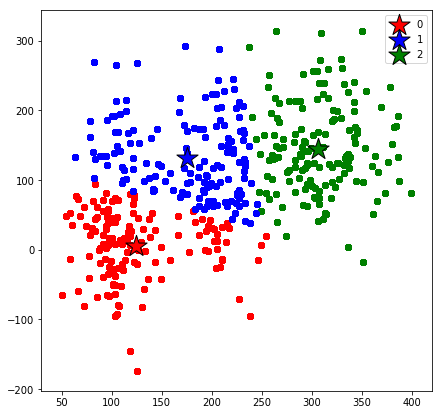

iteration 17  energy:  5143.21800819


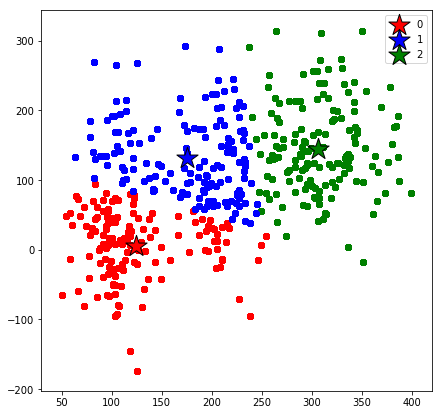

18 iteration with Euclidean distance (non square root)
final centroid of Euclidean distance (non square root)
label 0 :  ( 124 , 6 )
label 1 :  ( 175 , 132 )
label 2 :  ( 306 , 145 )


In [75]:
x_centroid = init_x_centroid
y_centroid = init_y_centroid
labels = initLabel[:]
plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels)
energy = sys.maxsize
iteration = 1
while energy > computeEnergy(x_values, y_values, x_centroid, y_centroid, labels):
    energy = computeEnergy(x_values, y_values, x_centroid, y_centroid, labels)
    print("iteration",iteration," energy: ", energy)
    assignLabel(x_values, y_values, x_centroid, y_centroid,labels, k, n, 1)
    x_centroid, y_centroid = computeCentroid(k, x_values, y_values, labels)
    plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels)
    iteration = iteration + 1
print(iteration,"iteration with Euclidean distance (non square root)")
print("final centroid of Euclidean distance (non square root)")
for i in range(k):
    print("label",i,": ","(", x_centroid[i],",",y_centroid[i],")")

# c. using Manhattan distance for computing distance

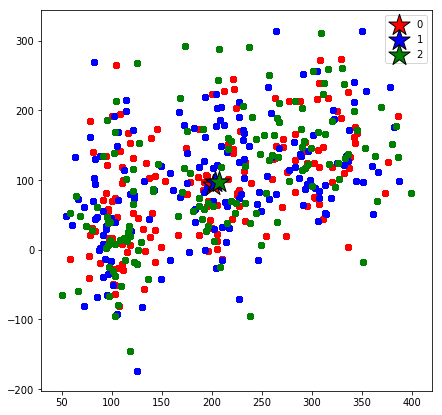

iteration 1  energy:  14873.0246409


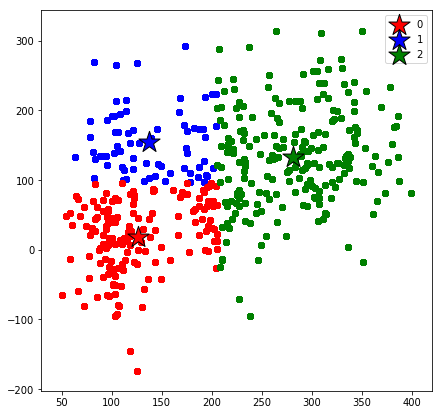

iteration 2  energy:  5862.96767156


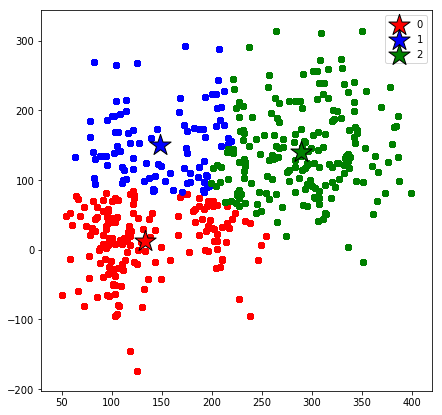

iteration 3  energy:  5331.80014421


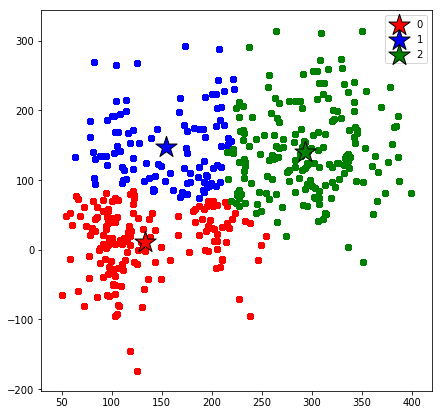

iteration 4  energy:  5259.41772431


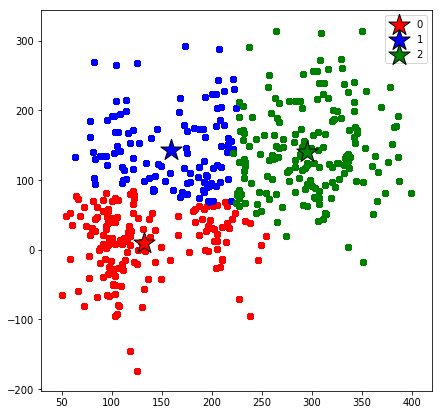

iteration 5  energy:  5236.27309967


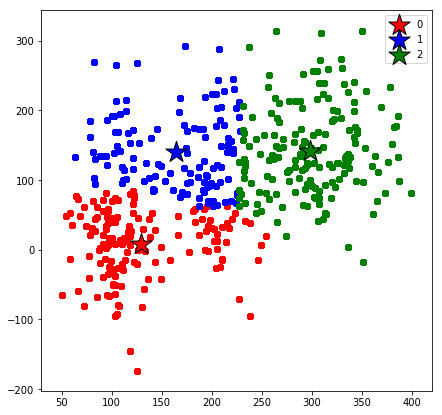

iteration 6  energy:  5212.22572677


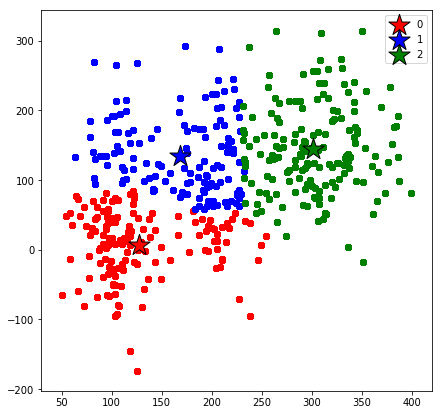

iteration 7  energy:  5183.76388932


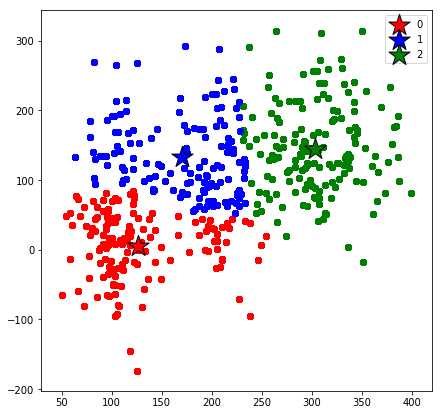

iteration 8  energy:  5166.84613512


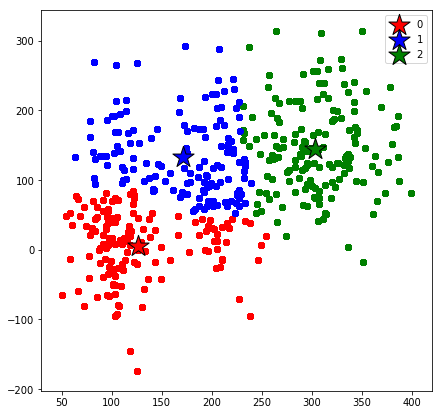

iteration 9  energy:  5165.65547473


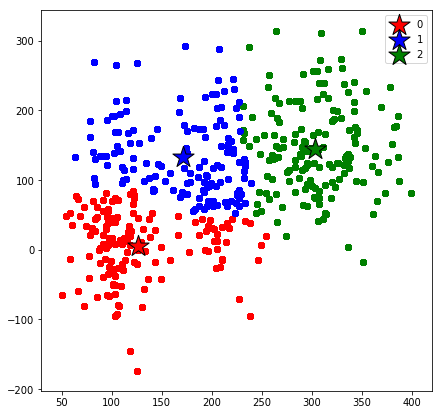

10 iteration with Manhattan distance
final centroid of Manhattan distance
label 0 :  ( 126 , 6 )
label 1 :  ( 171 , 133 )
label 2 :  ( 303 , 145 )


In [76]:
x_centroid = init_x_centroid
y_centroid = init_y_centroid
labels = initLabel[:]
plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels)
energy = sys.maxsize
iteration = 1
while energy > computeEnergy(x_values, y_values, x_centroid, y_centroid, labels):
    energy = computeEnergy(x_values, y_values, x_centroid, y_centroid, labels)
    print("iteration",iteration," energy: ", energy)
    assignLabel(x_values, y_values, x_centroid, y_centroid,labels, k, n, 2)
    x_centroid, y_centroid = computeCentroid(k, x_values, y_values, labels)
    plotPoint(k, x_values, y_values, x_centroid, y_centroid, labels)
    iteration = iteration + 1
print(iteration,"iteration with Manhattan distance")
print("final centroid of Manhattan distance")
for i in range(k):
    print("label",i,": ","(", x_centroid[i],",",y_centroid[i],")")

# - using Euclidean distance with square root and without square root are same in iteration, each iteration's engergy and each iteration's centroid
# - using Manhattan distance is quicker in clustering but larger final energy than using Euclidean distance